A continuación se propone un flujo de trabajo que integra la metodología CRISP-DM con algunos principios de DataOps, adaptado para un bootcamp de data science y teniendo en cuenta que es la primera vez que se analiza el dataset (y, por tanto, se realiza un análisis exploratorio inicial y una primera entrega). Se debe prestar especial atención a no realizar transformaciones irreversibles (por ejemplo, eliminar columnas vacías) sin antes evaluar y comparar alternativas, ya que podrían perderse datos relevantes y generar sesgos. La estrategia se puede dividir en las siguientes fases:

# Plan

1. Comprensión del Negocio (Business Understanding)  
   - Revisar la descripción del proyecto para entender el objetivo: predecir la cancelación de clientes, identificar segmentos de usuarios y formular recomendaciones para mejorar la retención citeturn0file0.  
   - Definir preguntas clave: ¿Qué indicadores reflejan la pérdida de clientes? ¿Cómo segmentar a los usuarios para personalizar estrategias de retención?

2. Comprensión de los Datos (Data Understanding)  
   - **Carga de datos:** Importar el dataset (por ejemplo, usando `pandas.read_csv()`).  
   - **Análisis preliminar:**  
     - Ejecutar `df.describe()`, `df.info()` y otras funciones para entender la estructura, distribuciones, y posibles valores faltantes.  
     - Visualizar la variable objetivo `'Churn'` y compararla con las demás variables (por ejemplo, usando `groupby()` y gráficos de barras o histogramas).  
   - **Documentar hallazgos:** Registrar observaciones relevantes, tales como la presencia de columnas con muchos valores nulos.

3. Preparación de los Datos (Data Preparation)  
   - **Tratamiento de datos faltantes:**  
     - Identificar columnas con valores nulos o vacíos.  
     - *Importante:* No eliminar columnas vacías de forma automática. Se deben evaluar distintas alternativas (por ejemplo, imputación vs. eliminación) y analizar el impacto en el análisis y la posible introducción de sesgos.  
   - **Transformaciones y escalado:**  
     - Estandarizar y normalizar variables cuando sea necesario, especialmente para el análisis de clustering.  
   - **Registro y versionado:**  
     - Aplicar principios de DataOps: versionar scripts/notebooks, documentar cada transformación y mantener un historial reproducible de los cambios.

4. Modelado (Modeling)  
   - **Modelos de clasificación:**  
     - Dividir los datos en conjuntos de entrenamiento y validación usando `train_test_split()` con un parámetro `random_state` fijo para reproducibilidad.  
     - Entrenar dos modelos:  
       - **Regresión logística**  
       - **Bosque aleatorio**  
     - Evaluar ambos modelos utilizando métricas como exactitud, precisión y recall para comparar resultados.  
   - **Modelos de clustering:**  
     - Realizar un análisis jerárquico (por ejemplo, utilizando `linkage()` y trazando un dendrograma) para estimar el número de clústeres.  
     - Aplicar K-means (inicialmente con 5 clústeres, para facilitar la comparación) y analizar los perfiles de cada grupo.  
     - Utilizar `groupby()` para calcular la tasa de cancelación en cada clúster y detectar patrones.

5. Evaluación (Evaluation)  
   - Revisar y documentar las métricas de desempeño de los modelos de clasificación.  
   - Analizar la robustez y significancia de los clusters obtenidos, comparando los valores medios y distribuciones de las características por grupo.  
   - Determinar cuál modelo o combinación de estrategias proporciona una mejor comprensión de los patrones de cancelación.

6. Implementación y Presentación de Resultados (Deployment)  
   - Preparar un reporte final que resuma el análisis, las pruebas realizadas, los modelos evaluados y las conclusiones obtenidas.  
   - Incluir recomendaciones estratégicas para la retención de clientes basadas en los insights extraídos del análisis (por ejemplo, identificar grupos propensos a abandonar y definir acciones específicas de marketing).  
   - Aunque en este caso no se automatizará el proceso, se recomienda dejar preparado el entorno (versionado de código, documentación detallada, tests unitarios para transformaciones) para facilitar futuras iteraciones siguiendo principios de DataOps.

# code

## 1. Exploratory Data Analysis

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

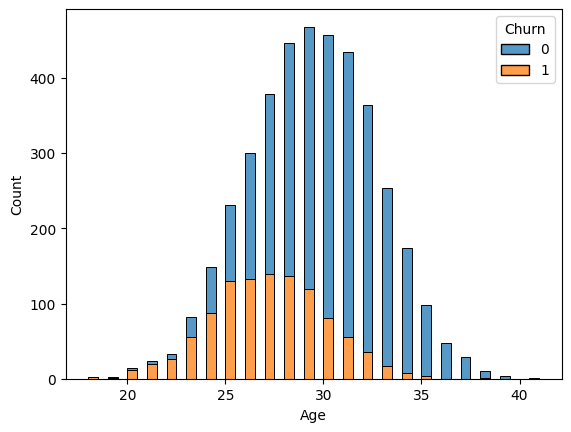

,0
gender,0
Near_Location,0
Partner,0
Promo_friends,0
Phone,0
Contract_period,0
Group_visits,0
Age,0
Avg_additional_charges_total,0
Month_to_end_contract,0


In [ ]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown


# 2. Carga y Comprensión de los Datos
df = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv")
display(df.describe())
display(df.info())

# 3. Análisis Exploratorio de Datos (EDA)
# Visualización de distribuciones y comparación de grupos (Churn vs. No Churn)
sns.histplot(data=df, x='Age', hue='Churn', multiple='stack')
plt.show()

# Evaluación de valores nulos y columnas vacías
missing_values = df.isnull().sum()
display(missing_values)

# 4. Preparación de Datos

Documentar y analizar opciones antes de eliminar columnas con alta proporción de nulos

Logistic Regression: 0.9233333333333333 0.8791946308724832 0.8238993710691824
Random Forest: 0.9166666666666666 0.8732876712328768 0.8018867924528302


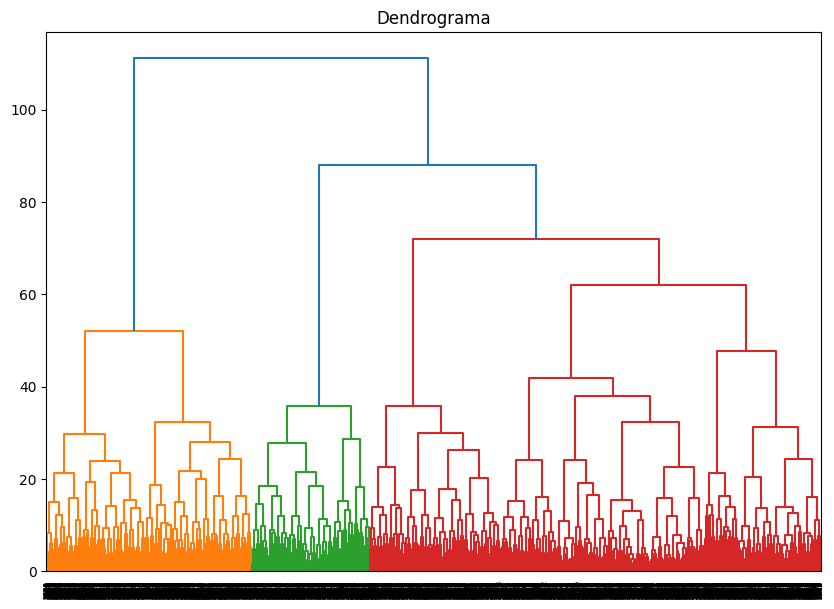

In [ ]:
# 5. Modelado
# División de datos en entrenamiento y validación
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Escalado de características - Data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de Regresión Logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Modelo de Bosque Aleatorio
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación de Modelos
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr))
print("Random Forest:", accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf))

In [ ]:
!pip install lazypredict

# 6. Clustering
# Dendrograma para estimar número óptimo de clusters
#linked = linkage(X_scaled, 'ward')
#plt.figure(figsize=(10, 7))
#dendrogram(linked)
#plt.title('Dendrograma')
#plt.show()

# Aplicación de K-Means (n_clusters=5 inicialmente)
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['cluster'] = kmeans.fit_predict(X_scaled)
# print(df.groupby('cluster').mean())